<a href="https://colab.research.google.com/github/AcerPing/keras_yolov3_bridge_detection/blob/master/Tiny_yolo_display.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 1.x
# import tensorflow as tf
# print("tf:",tf.__version__)

TensorFlow 1.x selected.


In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
import sys
FOLDER_PATH = '/content/drive/My Drive/keras_yolov3_bridge_detection'
sys.path.append(FOLDER_PATH)

In [4]:
import numpy as np
import tensorflow.python.keras.backend as K
from tensorflow.keras.layers import Input, Lambda
from train import yolo_body, get_anchors, create_model, get_classes
from yolo import YOLO
import cv2
from PIL import Image
import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [5]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/tiny_yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep090-loss10.877-val_loss11.256.h5'), 
            classes_path=classes_path,
            anchors_path=anchors_path)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.

/content/drive/My Drive/keras_yolov3_bridge_detection/ep090-loss10.877-val_loss11.256.h5 model, anchors, and classes loaded.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/content/drive/My Drive/keras_yolov3_bridge_detection/dataset/train_img/03203.jpg
(227, 227) (256, 256)
(256, 256, 3)
Found 1 boxes for img
concrete crack 0.94 (21, 88) (226, 213)
2.613419815000043


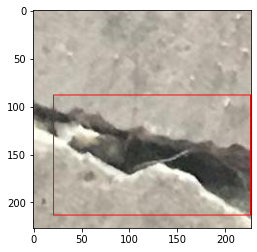

In [6]:
path = np.random.choice(glob(os.path.join(FOLDER_PATH, 'dataset/train_img/*')), 1)[0]
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.imshow(r_image)

## Yolo pretrained COCO

In [7]:
classes_path = os.path.join(FOLDER_PATH, 'model_data/aoi_classes.txt')
class_names = get_classes(classes_path)
num_classes = len(class_names)
anchors_path = os.path.join(FOLDER_PATH, 'model_data/tiny_yolo_anchors.txt')
anchors = get_anchors(anchors_path)

yolo = YOLO(model_path=os.path.join(FOLDER_PATH, 'ep090-loss10.877-val_loss11.256.h5'),
            classes_path=classes_path,
            anchors_path=anchors_path)

/content/drive/My Drive/keras_yolov3_bridge_detection/ep090-loss10.877-val_loss11.256.h5 model, anchors, and classes loaded.


/content/drive/My Drive/keras_yolov3_bridge_detection/testing_pictures/P1230093.JPG
(4608, 3456) (256, 256)
(256, 256, 3)
Found 1 boxes for img
concrete crack 0.48 (907, 317) (4260, 2573)
0.3773387339999772


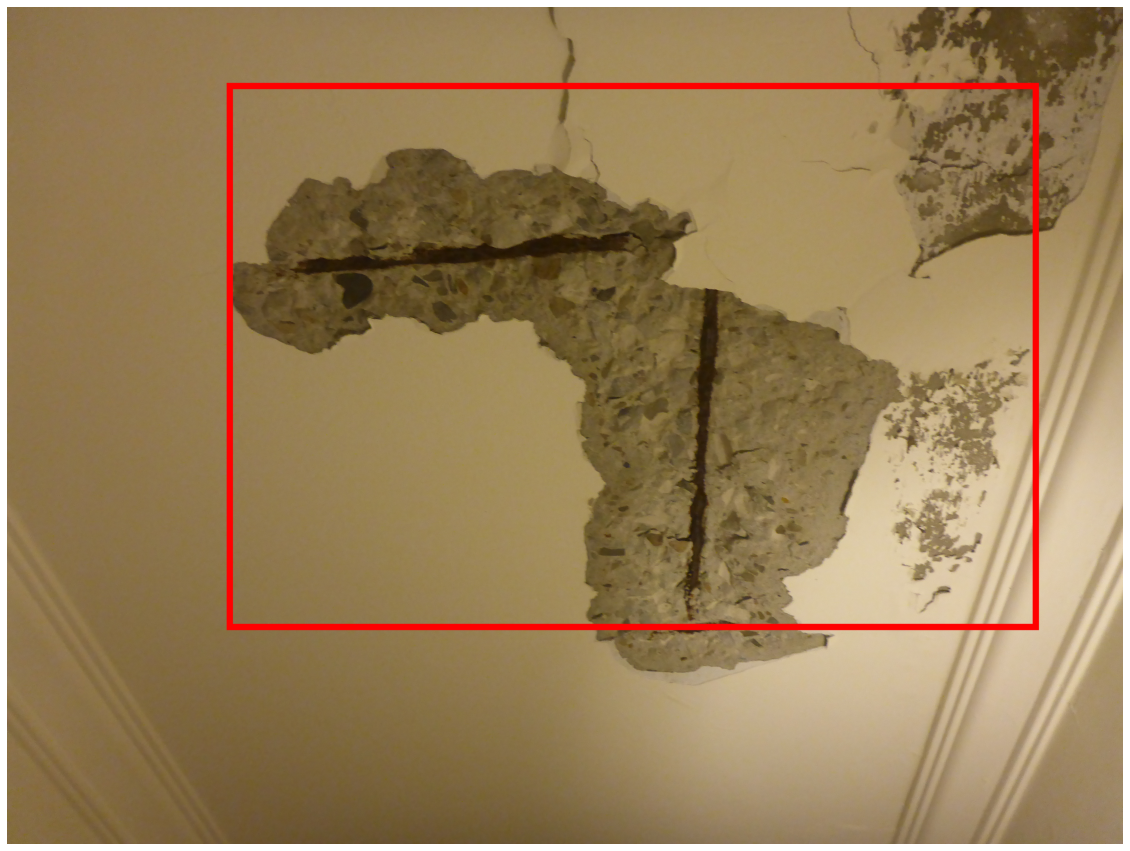

In [30]:
path = os.path.join(FOLDER_PATH, 'testing_pictures/P1230093.JPG')
print(path)
image = Image.open(path)
r_image = yolo.detect_image(image)
r_image.show()
plt.figure(figsize=(20,20))
plt.axis("off")
plt.imshow(r_image)


In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from tqdm.auto import tqdm
import os

import keras
from keras.layers import TimeDistributed, Conv2D, GlobalAveragePooling2D, Dense, MaxPooling2D, Input, LSTM, Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.models import Model
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split

In [10]:
IMG_SIZE = 128 #200

In [11]:
def preprocess(img, img_size):
    return cv2.resize(img, (img_size, img_size))

In [12]:
# load video
path = '/content/drive/My Drive/keras_yolov3_bridge_detection/testing_pictures/Produce.mp4'
# path = 'dataset/Biking/v_Biking_g01_c01.avi'
frames = np.zeros((0, IMG_SIZE, IMG_SIZE, 3))
cap = cv2.VideoCapture(path)
success, img = cap.read()
img = preprocess(img, IMG_SIZE)
img = np.expand_dims(img, axis=0)
frames = np.concatenate((frames, img))
count = 1
while success:
    success, img = cap.read()
    if success:
        img = preprocess(img, IMG_SIZE)
        img = np.expand_dims(img, axis=0)
        frames = np.concatenate((frames, img))
        # print('Read a new frame: ', success)
        count += 1
print(count)

150


In [13]:
frames.shape

(150, 128, 128, 3)

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.62 (434, 99) (4603, 621)
concrete crack 0.81 (546, 438) (4487, 3456)
0.10584949899998719


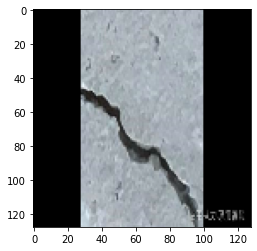

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.75 (477, 292) (4602, 3456)
concrete crack 0.84 (24, 75) (4608, 877)
0.11698797899998681


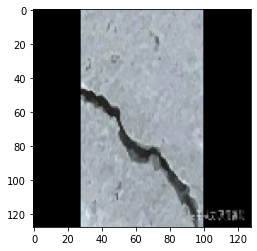

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.66 (274, 331) (4608, 3456)
concrete crack 0.90 (0, 0) (4608, 795)
0.10724707400004263


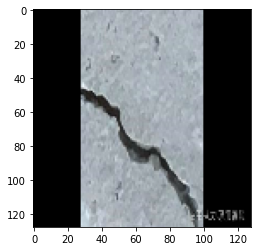

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.42 (327, 325) (4608, 3456)
concrete crack 0.70 (38, 29) (4608, 847)
0.11399018599990995


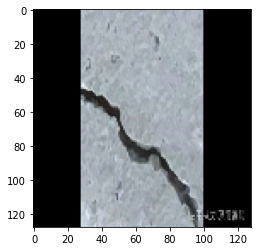

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.48 (318, 390) (4608, 3456)
concrete crack 0.68 (0, 51) (4608, 833)
0.10734807699998328


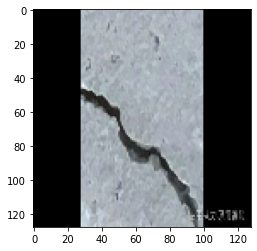

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (0, 87) (4608, 856)
concrete crack 0.53 (322, 409) (4608, 3456)
0.11363349200007633


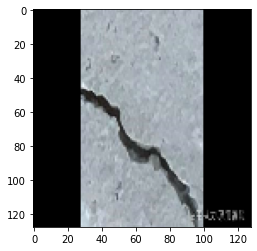

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.53 (321, 444) (4608, 3456)
concrete crack 0.62 (3, 58) (4608, 876)
0.10647911599994586


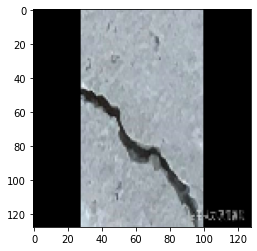

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 442) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10808363399996779


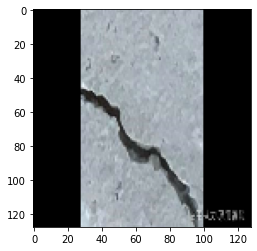

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.12191885900006127


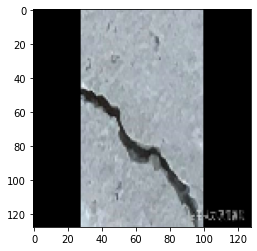

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10828326800003651


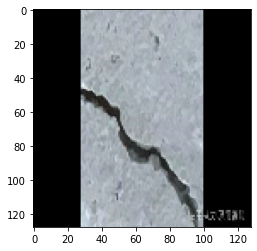

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10720899900002223


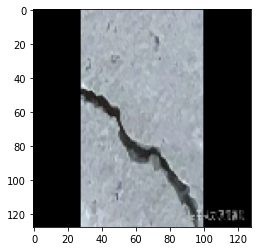

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10866673099997115


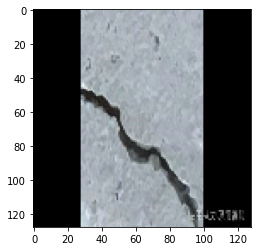

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11187817600000471


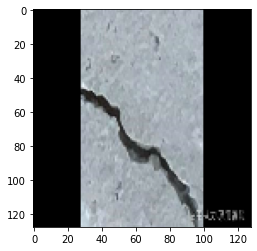

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11303155500002049


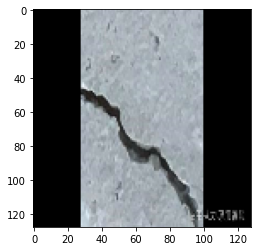

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11576370499994937


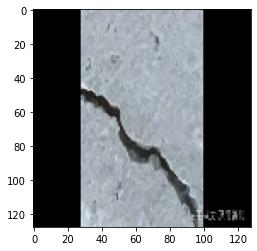

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.12420329799999763


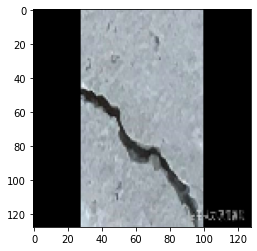

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11733408899999631


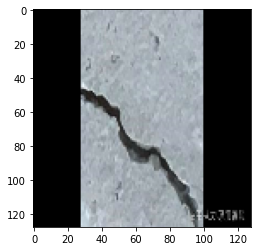

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10904969799992159


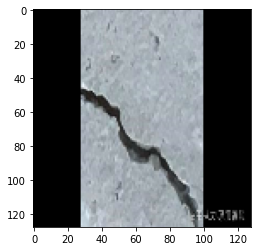

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11045676699995965


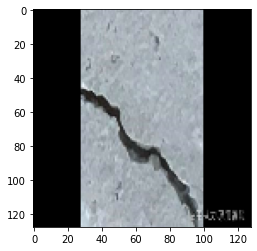

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10792698900002051


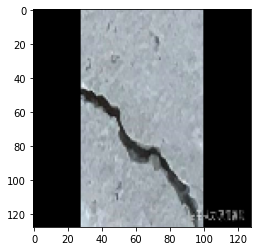

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11524805999999899


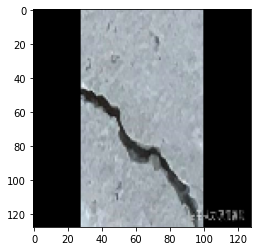

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11382797299995673


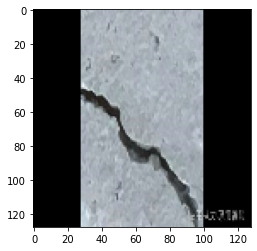

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11017753999999513


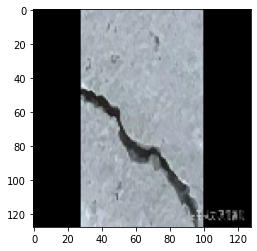

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11052926400009255


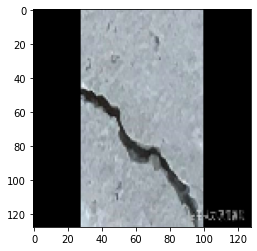

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11365011300006245


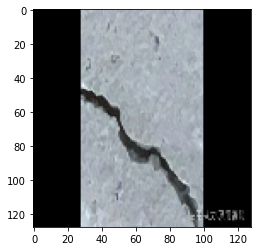

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11199579399999493


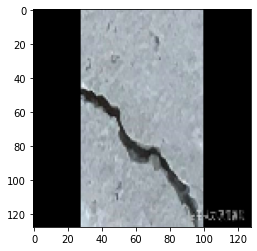

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10970833700002913


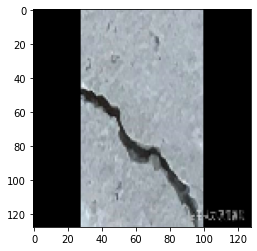

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.10854457400000683


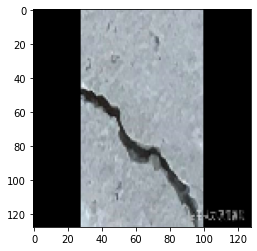

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.110553651000032


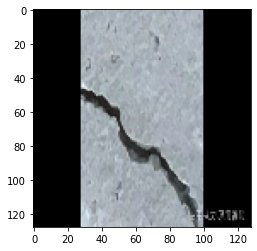

(4608, 3456) (256, 256)
(256, 256, 3)
Found 2 boxes for img
concrete crack 0.52 (326, 441) (4608, 3456)
concrete crack 0.64 (0, 54) (4608, 876)
0.11339892399996643


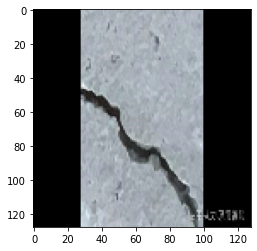

In [14]:
for frame in frames[:30]:
    # print(frames.shape)
    frame = frame / 255.
    r_image = yolo.detect_image(image)
    r_image.show()
    plt.imshow(frame)
    plt.show()